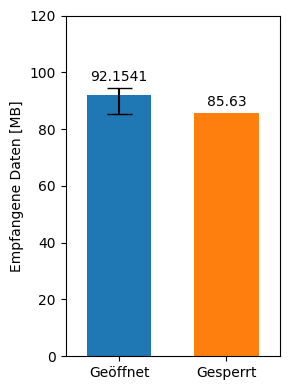

In [51]:
import json
import numpy as np
import matplotlib.pyplot as plt

data_file = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\RAW - Wifi_android\pcapAnalyzeResult_2023-06-30-16-02-28.json"
comparison_file = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Android_Closed\pcapAnalyzeResult_2023-07-03-18-33-07.json"



# Laden der Daten aus der Datei
with open(data_file, "r") as file:
    data = json.load(file)

with open(comparison_file, "r") as file:
    comparison_data = json.load(file)

# Extrahieren der relevanten Werte
file_paths = [entry["filePath"] for entry in data]
total_sizes = [entry["totalSize"]/1000000 for entry in data]

comparison_total_size = np.round(comparison_data[0]["totalSize"]/1000000,2)

# Berechnung der Mittelwerte, Minimum und Maximum
mean = np.mean(total_sizes)
min_value = np.min(total_sizes)
max_value = np.max(total_sizes)


# Plot erstellen
fig, ax = plt.subplots(figsize=(3,4))
bar_width = 0.6
index = np.arange(2)

# Bar für data_file
vals = ax.bar(index[0], mean, yerr=[[mean - min_value], [max_value - mean]], width=bar_width,capsize=9 , label='Data File')
ax.bar_label(vals, padding=3)

# Bar für comparison_file
vals = ax.bar(index[1], comparison_total_size, width=bar_width, label='Comparison File')

ax.bar_label(vals, padding=3)
ax.set_xlim(-0.5,1.5)
ax.set_ylim(0,120)
ax.set_xticks(index)
ax.set_xticklabels(['Geöffnet', 'Gesperrt'])
ax.set_ylabel('Empfangene Daten [MB]')

# ax.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images\closed_PcapSizeComparison.png", dpi=500)
plt.show()

